## salma eid (18102486)
# image proscessing _project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#importing some libraries

In [ ]:
import numpy as np
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import os
import csv
from google.colab.patches import cv2_imshow as imshow
import matplotlib.image as mpimg
import pandas as pd
from google.colab import drive
import math


##loading the dataset

In [ ]:
 #loading images into arrays to loop on them
cloudy = []
for filename in os.listdir('./drive/MyDrive/cloudy'):
  cloudy.append(cv.imread(f'./content/drive/MyDrive/cloudy/{filename}'))
cloudy=np.array(cloudy)

green_area = []
for filename in os.listdir('./drive/MyDrive/green_area'):
  green_area.append(cv.imread(f'./content/drive/MyDrive/green_area/{filename}'))
green_area=np.array(green_area)
print(len(cloudy))

1501


###testing images

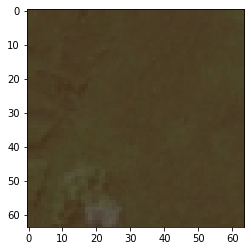

In [ ]:
cloudy_testimg=cv2.imread("/content/drive/MyDrive/cloudy/train_10021.jpg")
green_area_testimg=cv2.imread("/content/drive/MyDrive/green_area/Forest_1404.jpg")
plt.imshow(cloudy_testimg)
plt.imshow(green_area_testimg)

###compare the input of a convolution directly to the output.

In [ ]:
#def resizing(images):
 # images= cv2.resize(images, (100,100), interpolation = cv2.INTER_AREA)
  #images= cv2.cvtColor(images, cv2.COLOR_BGR2RGB)

 # return images

In [ ]:
def resize_img(images):

  img = cv.resize(images, (100,100), interpolation = cv.INTER_AREA)
  img = cv.cvtColor(images, cv.COLOR_BGR2GRAY)

  return resize_img

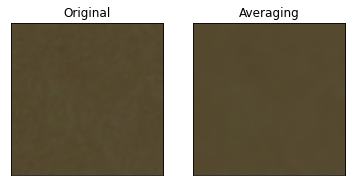

In [ ]:
#2d convultional (take the average, and replace the central pixel with the new average value)
img =cv.imread('/content/drive/MyDrive/green_area/Forest_2283.jpg')
kernel=np.ones((5,5),np.float32)/25
dst =cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

###blurring the image

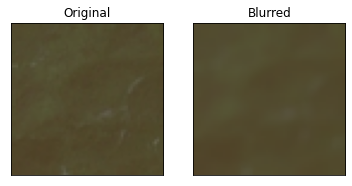

In [ ]:
#blurring the image
img = cv.imread('/content/drive/MyDrive/green_area/Forest_1480.jpg')
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
##gussian blurring (Gaussian blurring is highly effective in removing Gaussian noise from an image.)
def blur(images):
 blur =cv2.GaussianBlur(cloudy_testimg,(5,5),0)
 return blur


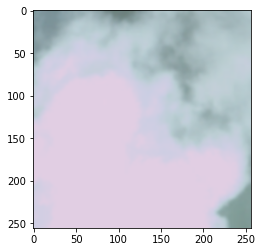

In [ ]:
plt.imshow(blur(cloudy_testimg))

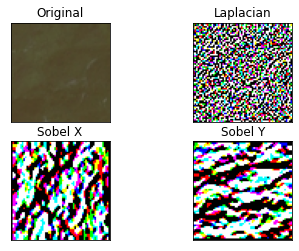

In [ ]:
#sobel function
def sobel(images):
 img = cv.imread('/content/drive/MyDrive/green_area/Forest_1480.jpg',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
##for making erosion
def erosion(images):
  kernel = np.ones((5,5),np.uint8)
  erosion = cv.erode(cloudy_testimg,kernel,iterations = 1)
  return erosion
 

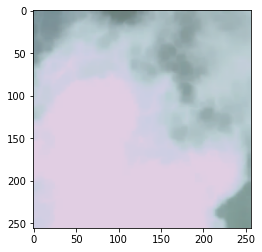

In [ ]:
plt.imshow(erosion(cloudy))

In [ ]:
##histogram equalization to enhance constract
def hist (images):
 img=cv.imread('/content/drive/MyDrive/cloudy/train_11492.jpg',0)
 equ = cv.equalizeHist(img)
 res = np.hstack((img,equ)) #stacking images side-by-side
 return res

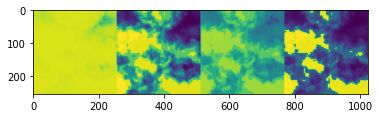

In [ ]:
 plt.imshow(hist(img))

In [ ]:
##Canny Edge Detection (extract useful structural information from different vision )
def canny(images):

 edges = cv.Canny(cloudy_testimg,100,100)
 return edges

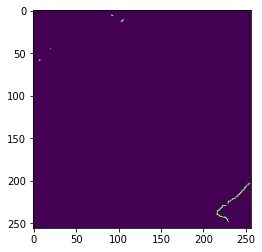

In [ ]:
plt.imshow(canny(cloudy_testimg))

###thresholding

In [ ]:
##change the pixels of an image to make the image easier to analyze
def threshold(images):
  img=cv.imread('/content/drive/MyDrive/cloudy/train_11492.jpg',0)
  ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
  return thresh1

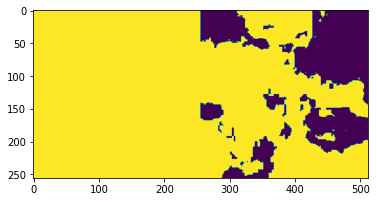

In [ ]:
plt.imshow(threshold(img))

In [ ]:
def Morphological_Gradient(images):
  kernel = np.ones((5,5),np.uint8)
  gradient = cv2.morphologyEx(cloudy_testimg, cv2.MORPH_GRADIENT, kernel)
  return gradient

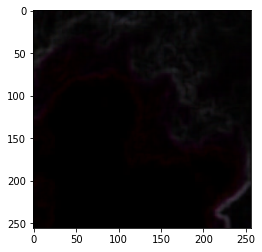

In [ ]:
plt.imshow(Morphological_Gradient(cloudy_testimg))

In [ ]:
def testing (images):
  #resizing_image=resizing(images).flatten.mean()
  erosion_image= erosion(images).flatten().std()
  histogram_image=hist (images).flatten().max()
  thresholding_image=threshold(images).flatten().mean()
  canny_image=canny(images).flatten().mean()
  blurring_image=blur(images).flatten().mean()
  #sobel_image=sobel(images).flatten().max()
  morphological_image= Morphological_Gradient(images).flatten().mean()
  output_process=np.concatenate((erosion_image,histogram_image,thresholding_image,blurring_image,canny_image, morphological_image ),axis=None)
  output_process=output_process/255
  output_process=output_process.flatten()
  return output_process

In [ ]:

#bd5l el swar f array wahda

cloudy_testing=[]
for i in range(len(cloudy)):
  cloudy_testing.append(testing(cloudy[i]))

green_testing=[]
for i in range(len(green_area)):
  green_testing.append(testing(green_area[i]))

x_cloudy_testing_np=np.array(cloudy_testing)
x_green_testing=np.array(green_testing)


y_cloudy=np.ones(x_cloudy_testing_np.shape[0]).flatten()
y_green_area=np.zeros(x_green_testing.shape[0]).flatten()

i=np.concatenate((x_cloudy_testing_np,x_green_testing),axis=0)
j=np.concatenate((y_cloudy,y_green_area),axis=0) 
print(pd.DataFrame(i).shape)
print(len(cloudy_testing),len(green_testing))



(3001, 6)
1501 1500


In [ ]:

frame_of_data=pd.DataFrame(i)
frame_of_data['content'] = j

#frame_of_data.columns =['resizing_image','erosion_image','histogram_image','thresholding_image','canny_image','blurring_image', 'morphological_image', 'content']


cloudy_folder=np.array(os.listdir('/content/drive/MyDrive/cloudy'))
green_area_folder=np.array(os.listdir('/content/drive/MyDrive/green_area'))

frame_of_data.index =np.concatenate((cloudy_folder,green_area_folder),axis=0)
frame_of_data.to_csv('content.csv', header=True, index=True)
frame_of_data.head()

,0,1,2,3,4,5,content
train_28991.jpg,0.095663,1.0,0.820312,0.800458,0.001572,0.017747,1.0
train_21922.jpg,0.095663,1.0,0.820312,0.800458,0.001572,0.017747,1.0
train_7820.jpg,0.095663,1.0,0.820312,0.800458,0.001572,0.017747,1.0
train_33597.jpg,0.095663,1.0,0.820312,0.800458,0.001572,0.017747,1.0
train_5541.jpg,0.095663,1.0,0.820312,0.800458,0.001572,0.017747,1.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test,y_train, y_test = train_test_split(i,j,random_state=0,test_size=0.25,shuffle=True)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.07%
